# Arbres binaires de recherche

## Première implémentation : en créant deux classes ad hoc

Complétez la classe Noeud qui permet de créer des arbres avec la classe Arbre Pensez récursif.

In [30]:
#from graphviz import Digraph

class Noeud:
    """
    Un noeud a une valeur et pointe vers deux autres noeuds (petit et
    grand) ou éventuellement le vide.
    On insère de nouvelles valeurs en partant de la racine du noeud et
    en bifurquant selon la comparaison avec la valeur du noeud.

    """

    def __init__(self, val):
        """
        Un noeud a toujours une valeur mais pointe vers un autre noeud
        ou éventuellement le vide (None)
        """
        self.__val = val
        self.__grand = None
        self.__petit = None

    
    def insere(self, val):
        """
        Permet d'insérer une valeur dans un noeud.
        """
        if val < self.__val:
            if  not self.__petit is None:
                Noeud(self.__petit).insere(Noeud(val).__val)
            else:
                self.__petit = val
        else:
            if not self.__grand is None:
                Noeud(self.__grand).insere(Noeud(val).__val)
            else:
                self.__grand = val
            
    def hauteur(self) -> int:
        """
        Nombre de niveaux de l'arbre
        """
        if self.est_feuille() == True:
            return 0
        elif self.__petit is None:
            return self.__grand.hauteur()
        elif self.__grand is None:
            return self.__petit.hauteur()
        else:
            return max(self.__petit.hauteur(),self.__grand.hauteur())

    def nb_noeuds(self) -> int:
        if self.est_feuille() == True:
            return 1
        elif self.__petit is None:
            return 1 + Noeud(self.__grand).nb_noeuds
        elif self.__grand is None:
            return 1 + Noeud(self.__petit).noeuds
        else:
            return 1 + Noeud(self.__petit).nb_noeuds() + Noeud(self.__grand).nb_noeuds()

    def est_feuille(self) -> bool:
        return True if self.__petit == None and self.__grand == None else False

    def nb_feuilles(self) -> int:
        cpt = 0
        if self.est_feuille() == True:
            cpt += 1 
        elif self.__petit is None:
            self.__grand.nb_noeuds
        elif self.__grand is None:
            self.__petit.noeuds
        else:
            self.__petit.nb_noeuds() + self.__grand.nb_noeuds()
        return cpt  
     
    def contient(self, val) -> bool:
        """
        Est-ce que v est une valeur contenue dans Noeud
        """
        if self.__val == val:
            return True
        else:
            if self.est_feuille == True:
                return True if val == self.__val else False
            elif self.__petit is None and self.__grand is not None:
                return Noeud(self.__grand).trouve(val)
            elif self.__petit is not None and self.__grand is None:
                return Noeud(self.__petit).trouve(val)
            else:
                return Noeud(self.__petit).trouve(val) or Noeud(self.__grand).trouve(val)



    def visite_pre(self) -> None:
        """
        Que fait ce code ?
        Expliquez la différence avec les deux suivants
        Cette méthode sert à lire un arbre en parcours préfixe.
        """
        print(self.__val)
        for cote in [self.__petit, self.__grand]:
            if cote is not None:
                cote.visite_pre()

    def visite_post(self) -> None:
        """
        Cette méthode sert à lire un arbre en parcours postfixe.
        """
        for cote in [self.__petit, self.__grand]:
            if cote is not None:
                cote.visite_post()
        print(self.__val)

    def visite_inf(self) -> None:
        """
        Cette méthode sert à lire un arbre en parcours infixe.
        """
        if self.__petit is not None:
            self.__petit.visite_inf()
        print(self.__val)
        if self.__grand is not None:
            self.__grand.visite_inf()

    def visite_niveau(self) -> None:
        """
        On veut obtenir les noeuds par niveau i.e. classés dans l'ordre 
        croissant des distances à la racine aka parcours en largeur 
        """
        print(self.__val)
        if self.__petit is not None and self.__grand is None:
            self.__petit.visite_niveau()
        if self.__petit is None and self.__grand is not None:
            self.__grand.visite_niveau()
        if self.__petit is not None and self.__grand is not None:
            return self.__petit.visite_niveau(), self.__grand.visite_niveau()
    
    def insertion(liste: list):
        for i in range (1,len(liste)):
            j = i
            while liste[j] < liste[j-1] and j != 0:
                liste[j], liste[j-1] = liste[j-1], liste[j]
                j-= 1
        return liste

    def mini(self):
        """
        La plus petite valeur 
        """
        ls = [self.visite_inf]
        insertion(ls)
        return ls[0]
        
    def maxi(self):
        """
        la plus grande valeur
        """
        ls = [self.visite_inf]
        insertion(ls)
        return ls[-1]
        
    #  Outils de représentation
    
    def viz(self):
        s = Digraph()
        def tree2viz(self):
            """
            À compléter...
            """
            v = self.__val
            if self.__petit and self.__grand:
                s.node(f'{self.__petit.__val}', style='filled',fillcolor='cadetblue3')
                s.node(f'{self.__grand.__val}', style='filled',fillcolor='cadetblue3')
                self.__petit.tree2viz()
                self.__grand.tree2viz()
            elif self.__petit and not self.__grand:
                s.node(f'{self.__petit.__val}', style='filled',fillcolor='cadetblue3')
                self.__petit.tree2viz()
            elif self.__grand and not self.__petit:
                s.node(f'{self.__grand.__val}', style='filled',fillcolor='cadetblue3')
                self.__grand.tree2viz()
            else:
                s.node(f'nullg{v}',shape='point')
                s.edge(f'{v}', f'nullg{v}')
                s.node(f'nullp{v}',shape='point')
                s.edge(f'{v}', f'nullp{v}')
        tree2viz(self)
        return s

    def affiche(self):
        """
        """
        s = self.viz()
        s.graph_attr['ordering']='out'
        return s
    
    ## OPTIONNEL : utilisez turtle pour créer la représentation des arbres et/ou networks


In [18]:
N = Noeud(1);N.insere(2);N.insere(4);N.insere(3);N.insere(10);N.insere(6)

In [19]:
N.affiche()

NameError: name 'Digraph' is not defined

In [33]:
N.hauteur

<bound method Noeud.hauteur of <__main__.Noeud object at 0x7fa0e81cbdc0>>

In [2]:
#from nbr import *

class Arbre:
    """
    Arbre binaire de recherche constitué de noeuds.
    Reprend les méthodes de la classe Noeud en incluant le cas vide
    et en construisant un arbre à partir d'un noeud.
    """

    def __init__(self) -> None:
        """
        Constructeur : un arbre est vide ou constitué de noeuds
        """
        self.__data = None

    def est_vide(self) -> bool:
        """
        Testeur : vérifie si un arbre est vide
        """
        return self.__data is None

    def insere(self, val) -> None:
        """
        Insère un élément comparable dans un arbre selon le critère
        choisi pour les noeuds.
        Si l'arbre est vide, crée le noeud-data
        """
        if self.__data is None:
            self.__data = Noeud(val)
        else:
            self.__data.insere(val)

    def hauteur(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.hauteur()

    def nb_noeuds(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.nb_noeuds()

    def est_feuille(self) -> bool:
        if self.__data is None:
            return False
        else:
            return self.__data.est_feuille()

    def nb_feuilles(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.nb_feuilles()

    def contient(self, v) -> bool:
        if self.__data is None:
            return False
        return self.__data.contient(v)

    def visite_pre(self) -> None:
        if self.__data:
            self.__data.visite_pre()

    def visite_post(self) -> None:
        if self.__data:
            self.__data.visite_post()

    def visite_inf(self) -> None:
        if self.__data:
            self.__data.visite_inf()

    def visite_inf_imp(self) -> None:
        if self.__data:
            self.__data.visite_inf_imp()

    def visite_niveau(self) -> None:
        if self.__data:
            self.__data.visite_niveau()

    def mini(self):
        assert self.__data, 'Arbre vide ! Pas de minimum'
        return self.__data.mini()

    def maxi(self):
        assert self.__data, 'Arbre vide ! Pas de maximum'
        return self.__data.maxi()

    def affiche(self) -> None:
        assert self.__data, 'Arbre vide'
        return self.__data.affiche()

    def __str__(self) -> str:
        if self.__data is None:
            return 'Arbre_Vide'
        else:
            return self.__data.__str__()


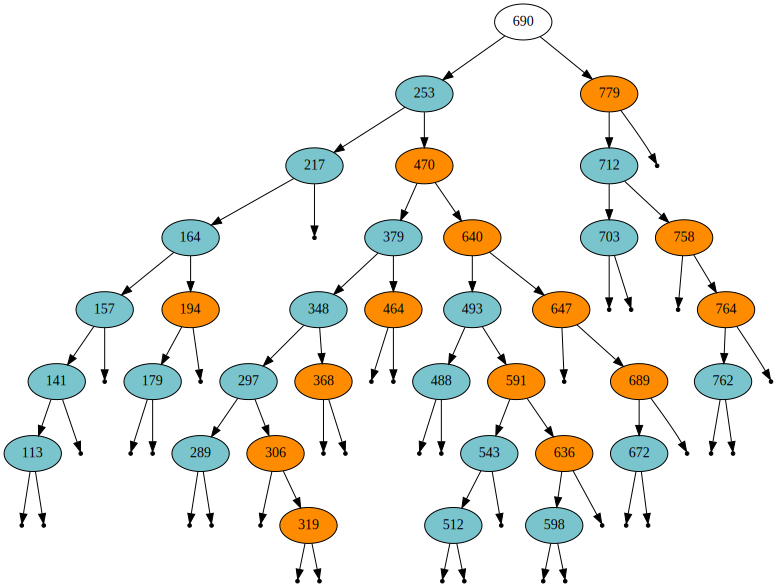

In [7]:
import random

A = Arbre()

for k in random.sample(range(100,800), 35):
    A.insere(k)
    
A.affiche()

In [110]:
from urllib.request import urlretrieve
import re

urlretrieve('https://www.gutenberg.org/files/2650/2650-0.txt', 'swann.txt')
fic = open('swann.txt', 'r').read()
texte = re.sub('[^A-ZÉÈÀÙÊÔÂÜÛÏÎa-zéèàùêôâüûïî]+', ' ', fic)
mots = {m.lower() for m in texte.split()}

sw = Arbre()
for mot in mots:
    sw.insere(mot)

In [111]:
sw.hauteur()

30

In [112]:
sw.nb_feuilles()

5247

In [113]:
sw.nb_noeuds()

15731

In [114]:
sw.contient('madeleine')

En 12 comparaisons


True

In [115]:
sw.contient('binaire')

En 15 comparaisons


False

## Autre implémentation : avec des dictionnaires

Un arbre serait un dictionnaire {Parent:(petit, grand)}. Comment obtenir les mêmes résultats que précédemment ?